### The problem

Consider the following poisson's equation:
$$
\frac{\partial u}{\partial t} = f + \nabla^{2} u
$$
defined over $\Omega \times (0,T]$.

The problem is first order in time, so we given a single initial condition:
$$
u(t=0) = u_{0}
$$

Also supply the boundary conditions
$$
u = u_{D}
$$

We use a semi-discrete method. From the Euler family, let's choose $\alpha = 1$ for the backwards Euler method. 

This has the infinite dimensional weak form:
$$
\int_{\Omega} \left(u_{n+1}v_{n+1} + \Delta t \nabla u_{n+1} \cdot \nabla v_{n+1}\right)\,dS = \int_{\Omega} \left(u_{n} + \Delta t f_{n+1}\right) v_{n+1}\,dS
$$

Concisely written as 
$$
a(u_{n+1},v_{n+1}) = L(v_{n+1}; u_{n}) 
$$

#### Test problem 2: diffusion of a Gaussian hill

Consider the case when the initial condition is 
$$
u_{0}(x,y) = e^{-ax^{2}} e^{-ay^{2}}
$$
for $a = 5$, over $\Omega = [-2,2] \times [2,2]$.

with Dirchlet boundary conditions $u_{D} = 0$, and $f = 0$.

In [68]:
from fenics import *

In [69]:
# define constants in the problem:
a = 5
T = 3.0
num_steps = 60
Dt = T/num_steps
# Consider a 30 by 30 element mesh over a 4 by 4 square
nx = ny = 30

In [70]:
# we supply two diagonal points to the rectangle
mesh = RectangleMesh(Point(-2,-2), Point(2,2), nx, ny)

In [71]:
# After meshing, lets define our finite dimensional function space
# linear lagrange polynomials
V = FunctionSpace(mesh, "CG", 1)

In [72]:
# now define the boundary conditions
def boundary(x, on_boundary):
    return on_boundary

u_D = Constant(0)
bc = DirichletBC(V, u_D, boundary)

In [73]:
# lets define our initial condition
u_0 = Expression("exp(-a*(pow(x[0],2) + pow(x[1], 2)))", degree = 2, a = a)

# express in terms of basis functions
u_n = interpolate(u_0, V)

In [74]:
# Now we define the weak form

# trial solution
u = TrialFunction(V)
# weighting functions
v = TestFunction(V)
# forcing
f = Expression("sin(t)", t=0, degree=2)

a = u*v*dx + Dt*dot(grad(u), grad(v))*dx
L = v*(u_n + Dt*f)*dx

Calling FFC just-in-time (JIT) compiler, this may take some time.


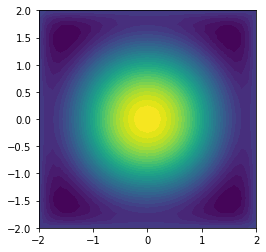

In [75]:
# reassign u. This is now our FEM solution
u = Function(V)
t = 0
vtkFile = File("Case2/gaussian_diffuse.pvd")
for n in range(num_steps): 
    t += Dt
    # we dont need to update our boundary condition.
    solve(a==L, u, bc)
    
    vtkFile << (u,t)
    # this is saying u_n = u. We are updating this function
    u_n.assign(u)  
plot(u)
    